In [44]:
import numpy as np
import matplotlib.pyplot as plt
def generate_linear(n=100):
    pts=np.random.uniform(0,1,(n,2))
    inputs=[]
    labels=[]
    for pt in pts :
        inputs.append([pt[0],pt[1]])
        #distance=(pt[0]*pt[1])/1.414
        if (pt[0]>pt[1]):
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs),np.array(labels).reshape(n,1)
def generate_xor_easy():
    inputs=[]
    labels=[]
    for i in range (11):
        inputs.append([0.1*i,0.1*i])
        labels.append(0)
        if 0.1*i ==0.5:
            continue
        inputs.append([0.1*i,1-0.1*i])
        labels.append(1)
    return np.array(inputs),np.array(labels).reshape(21,1)
x1,y1=generate_linear()
x2,y2=generate_xor_easy()



In [49]:
class NeuralNetwork(object):
    def __init__(self,inputlayer=2,hiddenlayer1=2,hiddenlayer2=2,outputlayer=1,lr=0.001):
        #parameter
        self.inputlayer=inputlayer
        self.hiddenlayer1=hiddenlayer1
        self.hiddenlayer2=hiddenlayer2
        self.outputlayer=1
        #weight
        self.w1=np.random.normal(size=(self.inputlayer,self.hiddenlayer1))#(2*2)
        self.w2=np.random.normal(size=(self.hiddenlayer1,self.hiddenlayer2))#(2*2)
        self.w3=np.random.normal(size=(self.hiddenlayer2,self.outputlayer))#(2*1)
        self.lr=lr
    def forward(self,x,activation='sigmoid'):
        if (activation=='sigmoid'):
            self.z=np.dot(x,self.w1)#(100,2)dot(2,2)=100,2
            self.a=self.sigmoid(self.z) #through activation funtion
            self.z2=np.dot(self.a,self.w2)#(100,2)dot(2,2)=100,2
            self.a2=self.sigmoid(self.z2)
            self.z3=np.dot(self.a2,self.w3)#100,2dot(2,1)=100,1個output
            output=self.sigmoid(self.z3)
            return output
        



    def backward(self,x,y,output,activation='sigmoid'):#backward propagate through the network
        if (activation=='sigmoid'):
            self.output_error=-2*(y-output)#error in output derivative(yt-y)^2-> -2(yt-y)
            self.output_delta=self.output_error*self.sigmoid(output,derive=True)

            self.z3_error=self.output_delta.dot(self.w3.T)
            self.z3_delta=self.z3_error*self.sigmoid(self.a2,derive=True)
            
            self.z2_error=self.z3_error.dot(self.w2.T)
            self.z2_delta=self.z2_error*self.sigmoid(self.a,derive=True)

            self.w1-=x.T.dot(self.z2_delta)*self.lr
            self.w2-=self.a.T.dot(self.z3_delta)*self.lr
            self.w3-=self.a2.T.dot(self.output_delta)*self.lr
        

    def train(self,x,y,activation='sigmoid'):
        output=self.forward(x,activation)
        self.backward(x,y,output,activation)

    def sigmoid(self,s,derive=False):
        if (derive==True):
            return s*(1-s)
        return 1/(1+np.exp(-s))
    def relu(self,s,derive=False):     
        if (derive==True):
            return np.heaviside(s,0.0) 
        return np.maximum(0.0, s)
    def tanh(self,x,derive=False) :
        if (derive==True):
            return 1.0 - x ** 2
        return np.tanh(x)
    def getweight(self):
        return self.w1,self.w2,self.w3


   






epoch: 0 loss:0.25675099757547065
epoch: 100 loss:0.2353847139945239
epoch: 200 loss:0.22983490920348548
epoch: 300 loss:0.2227795867131622
epoch: 400 loss:0.21306812931288927
epoch: 500 loss:0.1997563338850278
epoch: 600 loss:0.18215853694833478
epoch: 700 loss:0.16056832712564653
epoch: 800 loss:0.13688707479314252
epoch: 900 loss:0.11408657614217516
epoch: 1000 loss:0.09454730712032301
epoch: 1100 loss:0.07906607556392417
epoch: 1200 loss:0.06725134726697926
epoch: 1300 loss:0.05830373473513439
epoch: 1400 loss:0.05146533564779372
epoch: 1500 loss:0.04615085539652044
epoch: 1600 loss:0.04194116191282721
epoch: 1700 loss:0.03854314825355642
epoch: 1800 loss:0.03575187902011579
epoch: 1900 loss:0.033422522906342
epoch: 2000 loss:0.031451125279345314
epoch: 2100 loss:0.029761775459226383
epoch: 2200 loss:0.02829807102234806
epoch: 2300 loss:0.02701739877903655
epoch: 2400 loss:0.025887055029008614
epoch: 2500 loss:0.02488157438180671
epoch: 2600 loss:0.02398086169178137
epoch: 2700 los

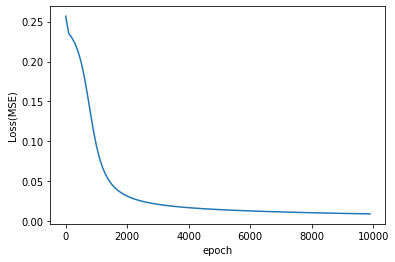

In [52]:
error_list=[]
model=NeuralNetwork(hiddenlayer1=5,hiddenlayer2=5)
for i in range (10000):
    model.train(x1,y1)
    if (i%100==0):
        error_list.append(np.mean(np.square(y1-model.forward(x1))))
        print('epoch:',i,'loss:'+str(np.mean(np.square(y1-model.forward(x1)))))

print('____')
print('loss:'+str(np.mean(np.square(y1-model.forward(x1)))))

fig,ax = plt.subplots()
ax.plot(np.arange((len(error_list)))*100,error_list)
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [ ]:

w1,w2,w3=model.getweight()
def classify(x,yin,w1,w2,w3):
    ylabel=[]
    z=np.dot(x,w1)#2dot(2,3)=3
    a=relu(z) #through activation funtion
    z2=np.dot(a,w2)#3dot(3,2)=2
    a2=relu(z2)
    z3=np.dot(a2,w3)#2dot(2,1)=1個output
    output=relu(z3)
    for i in range (x.shape[0]):
        if output[i]>0.5:
            ylabel.append(1)
        else :
            ylabel.append(0)
    ylabel=np.array(ylabel)
    ylabel=(ylabel.reshape((x.shape[0],1)))
    acc =len(ylabel[ylabel==yin])
    print(acc)
    

output=classify(x1,y1,w1,w2,w3)

60
